<a href="https://colab.research.google.com/github/parhambarazesh/PET575/blob/master/Kick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

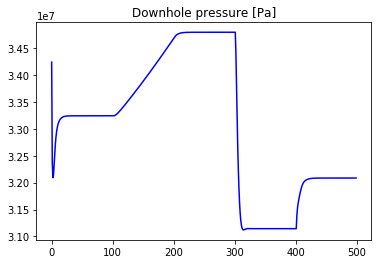

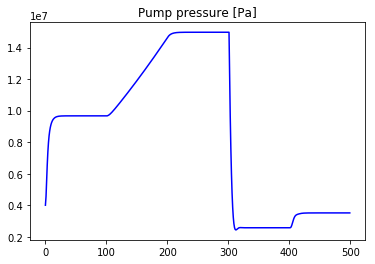

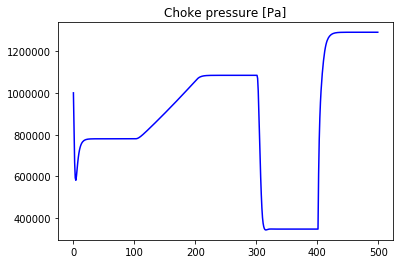

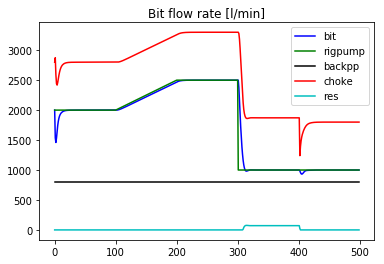

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Constants
maxtime = 500 # seconds
dt = 0.001 # euler step time

#Operator parameters
q_p = 2000/60000 # 2000 l/min
q_bpp = 800/60000 # 800 l/min
q_c = q_p + q_bpp # 2800 l/min
z_c = 0.1 # choke opening

# Wellbore parameters
h = 1951
beta_d =2e9
beta_a =1e9
V_d =17 # m3
V_a = 48 #m3
M = 4.3e8
Fd = 5e9
Fb = 1e9
Fa = 2e9
rho_d = 1580
rho_a = 1580
g = 9.81
k_c = 0.021

# reservoir parameters
p_pore = 3.15e7
p_frac = 3.75e7
ProdIndex = (100/60000)/5e5 # 100 l/min at delta p of 5 bar # 'permeability'

#Array initialization
p_p_ar = np.zeros(maxtime)
p_c_ar = np.zeros(maxtime)
p_b_ar = np.zeros(maxtime)
q_b_ar = np.zeros(maxtime)
q_c_ar = np.zeros(maxtime)
q_p_ar = np.zeros(maxtime)
q_bpp_ar = np.zeros(maxtime)
q_res_ar = np.zeros(maxtime)

# Initial values
p_p = 40e5
p_c = 10e5
q_b = 2000/60000
p_b = p_p + rho_d*g*h

# main iteration loop
for time in range(0,maxtime):
    # change mud pump rate
    if (time > 100) and (time <= 200):
        q_p = q_p + 5/60000 # ramp up to 2500 l/min

    if (time > 200):
        q_p = 2500/60000 # fixed at 2500 l/min

    if (time > 300):
        q_p = 1000/60000 # fixed at 2500 l/min
    
    if (time > 400):
        z_c = 0.05 # reduce choke to 5#
    
    #Pore pressure
    q_res = ProdIndex*(p_pore - p_b)
    if q_res < 0:
        q_res = 0
    
    #Frac pressure
    q_loss = ProdIndex*(p_frac -p_b)
    if q_loss > 0:
        q_loss = 0

    #store parameters
    p_p_ar[time] = p_p
    p_c_ar[time] = p_c
    p_b_ar[time] = p_b
    q_b_ar[time] = q_b
    q_p_ar[time] = q_p
    q_c_ar[time] = q_c
    q_bpp_ar[time] = q_bpp
    q_res_ar[time] = q_res
    
    # Euler integration loop
    for eulerstep in np.arange(1,(1/dt)):
        p_pdot = (beta_d/V_d)*(q_p-q_b)
        q_bdot = 1/M*((p_p-p_c)-(Fd+Fb+Fa)*q_b*q_b+(rho_d-rho_a)*g*h)
        p_cdot = (beta_a/V_a)*(q_b+q_res+q_bpp+q_loss-q_c)
        p_p = p_p + p_pdot*dt
        q_b = q_b + q_bdot*dt
        p_c = p_c + p_cdot*dt
        
        
        q_c = z_c*k_c*np.sqrt(p_c/rho_a)
        p_b1  = p_p+rho_d*g*h-(Fd+Fb)*q_b*q_b # pump pressure
        p_b = p_c+rho_a*g*h+Fa*q_b*q_b # using choke pressure

plt.figure(1)
plt.plot(np.arange(0,maxtime),p_b_ar,'b')
plt.title('Downhole pressure [Pa]')

plt.figure(2)
plt.plot(np.arange(0,maxtime),p_p_ar,'b')
plt.title('Pump pressure [Pa]')

plt.figure(3)
plt.plot(np.arange(0,maxtime),p_c_ar,'b')
plt.title('Choke pressure [Pa]')

plt.figure(4)
plt.plot(np.arange(0,maxtime),q_b_ar*60000,'b')
plt.plot(np.arange(0,maxtime),q_p_ar*60000,'g')
plt.plot(np.arange(0,maxtime),q_bpp_ar*60000,'k')
plt.plot(np.arange(0,maxtime),q_c_ar*60000,'r')
plt.plot(np.arange(0,maxtime),q_res_ar*60000,'c')
plt.title('Bit flow rate [l/min]')
plt.legend(['bit','rigpump','backpp','choke','res'])